# Model Hotel

In [1]:
import pandas as pd
import numpy as np
import tensorflowjs as tfjs
import tensorflow as tf
from tensorflowjs import converters
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
hotel_place = pd.read_csv("C:/Users/LENOVO/Downloads/Hotel_Data.csv")
hotel_place = hotel_place.drop(columns = "Unnamed: 0")
hotel_review = pd.read_csv("C:/Users/LENOVO/Downloads/Hotel_Reviewers.csv")
hotel_review = hotel_review.drop(columns = "Unnamed: 0")

In [3]:
hotel_place

,name,place_id,formatted_address,types,user_ratings_total,rating
0,INFINITY8 BALI,ChIJdx5uQ4NE0i0RxAGZcE6Wyrg,"Jalan By Pass Ngurah Rai.88A Jimbaran, Nusa Du...","spa,bar,gym,health,cafe,lodging,store,restaura...",1913,4.3
1,Quest Hotel San Denpasar,ChIJq3QFpi1H0i0RbTsqQ0bHQRQ,"Jl. Mahendradatta No.93, Padangsambian, Kec. D...","lodging,restaurant,food,point_of_interest,esta...",4799,4.4
2,"Atanaya Hotel - Kuta, Bali",ChIJSWQ_MM5G0i0R4tdodWT0918,"Jl. Sunset Road No.88A, Kuta, Kec. Kuta, Kabup...","cafe,lodging,store,restaurant,food,point_of_in...",3220,4.4
3,Hotel NEO Denpasar,ChIJd8xYDbQ40i0RHG-ww4X-0a8,"Jl. Gatot Subroto Barat, Padangsambian Kaja, K...","lodging,restaurant,food,point_of_interest,esta...",2617,4.4
4,HARRIS Hotel Kuta Galleria - Bali,ChIJLVt6f0FB0i0Rp_5Oey50FTs,"Jl. Bypass Ngurah Rai No.1, Kuta, Kec. Kuta, K...","lodging,point_of_interest,establishment",1602,4.3
...,...,...,...,...,...,...
1261,RedDoorz Plus near Amplaz Yogyakarta,ChIJ3b4uA91Zei4R2B1d6ynmKWo,"Jl. Nogorojo No.9, Ambarukmo, Caturtunggal, Ke...","lodging,point_of_interest,establishment",83,4.6
1262,Malyabhara Hotel,ChIJlSARKiZYei4RIRGFb80K4Fc,"Jl. Malioboro No.52 - 58, Suryatmajan, Kec. Da...","lodging,point_of_interest,establishment",141,4.8
1263,Summer Quest Hotel,ChIJZ11kaCZYei4RTsm_ZMznVJs,"Sosrowijayan St, Sosromenduran, Gedong Tengen,...","lodging,point_of_interest,establishment",802,4.1
1264,Kimaya Sudirman Yogyakarta by Harris,ChIJkaPNMjJYei4R3ci1mdlX780,"Jl. Jend. Sudirman No.89, Terban, Kec. Gondoku...","lodging,point_of_interest,establishment",5533,4.5


In [4]:
types_dummies = pd.get_dummies(hotel_place['types'].str.get_dummies(','), prefix='types', prefix_sep='_')
types_dummies

,art_gallery,bakery,bar,cafe,clothing_store,electronics_store,establishment,food,gym,health,...,park,parking,point_of_interest,real_estate_agency,restaurant,shopping_mall,spa,store,tourist_attraction,travel_agency
0,0,0,1,1,0,0,1,1,1,1,...,0,0,1,0,1,0,1,1,0,0
1,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,0
3,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1262,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1263,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1264,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
df_all = pd.concat([hotel_place, types_dummies], axis=1)
df_all = df_all.drop(columns = ["name", "formatted_address", "types"])
df_all = pd.merge(hotel_review, df_all, on = "place_id")
df_all.rename(columns={'rating': 'Ave_Rating'}, inplace=True)
df_all['reviewers_Id'] = pd.factorize(df_all['reviewer_name'])[0] + 1
df_all

,place_id,place_name,reviewer_name,reviewer_rating,reviewer_review,reviewers_Id,user_ratings_total,Ave_Rating,art_gallery,bakery,...,park,parking,point_of_interest,real_estate_agency,restaurant,shopping_mall,spa,store,tourist_attraction,travel_agency
0,ChIJdx5uQ4NE0i0RxAGZcE6Wyrg,INFINITY8 BALI,Gras Fresser,2,Spent one night here and it was more than enou...,1,1913,4.3,0,0,...,0,0,1,0,1,0,1,1,0,0
1,ChIJdx5uQ4NE0i0RxAGZcE6Wyrg,INFINITY8 BALI,Taylor Currie,4,The room was great. Comfortable bed. Really en...,2,1913,4.3,0,0,...,0,0,1,0,1,0,1,1,0,0
2,ChIJdx5uQ4NE0i0RxAGZcE6Wyrg,INFINITY8 BALI,Roman Gorbunov,2,Impressions about this hotel were very ambiguo...,3,1913,4.3,0,0,...,0,0,1,0,1,0,1,1,0,0
3,ChIJdx5uQ4NE0i0RxAGZcE6Wyrg,INFINITY8 BALI,Sarath Kumar,3,"Very nice, clean and well maintained hotel.\nT...",4,1913,4.3,0,0,...,0,0,1,0,1,0,1,1,0,0
4,ChIJdx5uQ4NE0i0RxAGZcE6Wyrg,INFINITY8 BALI,Souad Al,1,The service at Hotel Infinity8 was absolutely ...,5,1913,4.3,0,0,...,0,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6302,ChIJ-cWDJehZei4R8u6klsK_7I0,Royal Ambarrukmo Yogyakarta,Catherine Smith,5,Royal Ambarukmo is such a great place to stay ...,5386,16865,4.7,0,0,...,0,0,1,0,1,0,1,0,0,0
6303,ChIJ-cWDJehZei4R8u6klsK_7I0,Royal Ambarrukmo Yogyakarta,Me Min,5,I recently had the pleasure of staying at the ...,5387,16865,4.7,0,0,...,0,0,1,0,1,0,1,0,0,0
6304,ChIJ-cWDJehZei4R8u6klsK_7I0,Royal Ambarrukmo Yogyakarta,Fadhil Muhammad,5,I had a great moment here. My wedding conducte...,5388,16865,4.7,0,0,...,0,0,1,0,1,0,1,0,0,0
6305,ChIJ-cWDJehZei4R8u6klsK_7I0,Royal Ambarrukmo Yogyakarta,Eva Tambun,5,A comfortable good-value hotel not far from th...,5389,16865,4.7,0,0,...,0,0,1,0,1,0,1,0,0,0


In [6]:
df_place = df_all.drop(columns = ["place_name", "reviewer_name", "reviewer_rating", "reviewer_review", "reviewers_Id", "user_ratings_total", "point_of_interest", "tourist_attraction", "establishment"])
df_place

,place_id,Ave_Rating,art_gallery,bakery,bar,cafe,clothing_store,electronics_store,food,gym,...,lodging,night_club,park,parking,real_estate_agency,restaurant,shopping_mall,spa,store,travel_agency
0,ChIJdx5uQ4NE0i0RxAGZcE6Wyrg,4.3,0,0,1,1,0,0,1,1,...,1,0,0,0,0,1,0,1,1,0
1,ChIJdx5uQ4NE0i0RxAGZcE6Wyrg,4.3,0,0,1,1,0,0,1,1,...,1,0,0,0,0,1,0,1,1,0
2,ChIJdx5uQ4NE0i0RxAGZcE6Wyrg,4.3,0,0,1,1,0,0,1,1,...,1,0,0,0,0,1,0,1,1,0
3,ChIJdx5uQ4NE0i0RxAGZcE6Wyrg,4.3,0,0,1,1,0,0,1,1,...,1,0,0,0,0,1,0,1,1,0
4,ChIJdx5uQ4NE0i0RxAGZcE6Wyrg,4.3,0,0,1,1,0,0,1,1,...,1,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6302,ChIJ-cWDJehZei4R8u6klsK_7I0,4.7,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
6303,ChIJ-cWDJehZei4R8u6klsK_7I0,4.7,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
6304,ChIJ-cWDJehZei4R8u6klsK_7I0,4.7,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
6305,ChIJ-cWDJehZei4R8u6klsK_7I0,4.7,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [7]:
df_user = df_all.drop(columns = ["place_id", "place_name", "reviewer_review", "reviewer_name", "user_ratings_total", "Ave_Rating", "point_of_interest", "tourist_attraction", "establishment"])
reviewer_id = df_user.pop("reviewers_Id")
df_user.insert(0, 'reviewers_Id', reviewer_id)
df_user

,reviewers_Id,reviewer_rating,art_gallery,bakery,bar,cafe,clothing_store,electronics_store,food,gym,...,lodging,night_club,park,parking,real_estate_agency,restaurant,shopping_mall,spa,store,travel_agency
0,1,2,0,0,1,1,0,0,1,1,...,1,0,0,0,0,1,0,1,1,0
1,2,4,0,0,1,1,0,0,1,1,...,1,0,0,0,0,1,0,1,1,0
2,3,2,0,0,1,1,0,0,1,1,...,1,0,0,0,0,1,0,1,1,0
3,4,3,0,0,1,1,0,0,1,1,...,1,0,0,0,0,1,0,1,1,0
4,5,1,0,0,1,1,0,0,1,1,...,1,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6302,5386,5,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
6303,5387,5,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
6304,5388,5,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
6305,5389,5,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [8]:
column_sum = df_user.loc[:, 'art_gallery':'travel_agency'].sum()
column_sum

art_gallery              5
bakery                   5
bar                    100
cafe                    80
clothing_store          15
electronics_store        5
food                   510
gym                     65
health                  75
home_goods_store         5
lodging               6272
night_club              25
park                     5
parking                 10
real_estate_agency       5
restaurant             490
shopping_mall           10
spa                    190
store                   75
travel_agency           20
dtype: int64

In [9]:
df_user.iloc[:, 2:] = df_user.iloc[:, 2:].mul(df_user["reviewer_rating"], axis=0)
df_user

,reviewers_Id,reviewer_rating,art_gallery,bakery,bar,cafe,clothing_store,electronics_store,food,gym,...,lodging,night_club,park,parking,real_estate_agency,restaurant,shopping_mall,spa,store,travel_agency
0,1,2,0,0,2,2,0,0,2,2,...,2,0,0,0,0,2,0,2,2,0
1,2,4,0,0,4,4,0,0,4,4,...,4,0,0,0,0,4,0,4,4,0
2,3,2,0,0,2,2,0,0,2,2,...,2,0,0,0,0,2,0,2,2,0
3,4,3,0,0,3,3,0,0,3,3,...,3,0,0,0,0,3,0,3,3,0
4,5,1,0,0,1,1,0,0,1,1,...,1,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6302,5386,5,0,0,5,0,0,0,5,0,...,5,0,0,0,0,5,0,5,0,0
6303,5387,5,0,0,5,0,0,0,5,0,...,5,0,0,0,0,5,0,5,0,0
6304,5388,5,0,0,5,0,0,0,5,0,...,5,0,0,0,0,5,0,5,0,0
6305,5389,5,0,0,5,0,0,0,5,0,...,5,0,0,0,0,5,0,5,0,0


In [10]:
y = df_user.pop("reviewer_rating")
y

0       2
1       4
2       2
3       3
4       1
       ..
6302    5
6303    5
6304    5
6305    5
6306    5
Name: reviewer_rating, Length: 6307, dtype: int64

In [11]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6307 entries, 0 to 6306
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   reviewers_Id        6307 non-null   int64
 1   art_gallery         6307 non-null   int64
 2   bakery              6307 non-null   int64
 3   bar                 6307 non-null   int64
 4   cafe                6307 non-null   int64
 5   clothing_store      6307 non-null   int64
 6   electronics_store   6307 non-null   int64
 7   food                6307 non-null   int64
 8   gym                 6307 non-null   int64
 9   health              6307 non-null   int64
 10  home_goods_store    6307 non-null   int64
 11  lodging             6307 non-null   int64
 12  night_club          6307 non-null   int64
 13  park                6307 non-null   int64
 14  parking             6307 non-null   int64
 15  real_estate_agency  6307 non-null   int64
 16  restaurant          6307 non-null   int64


In [12]:
average_values = df_user.groupby("reviewers_Id")[["art_gallery", "bakery", "bar", "cafe", "clothing_store", "electronics_store", "food", "gym", "health", "home_goods_store", "lodging", "night_club", "park", "parking", "real_estate_agency", "restaurant", "shopping_mall", "spa", "store", "travel_agency"]].mean()
average_values = average_values.reset_index()
average_values

,reviewers_Id,art_gallery,bakery,bar,cafe,clothing_store,electronics_store,food,gym,health,...,lodging,night_club,park,parking,real_estate_agency,restaurant,shopping_mall,spa,store,travel_agency
0,1,0.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0
1,2,0.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0,4.0,...,4.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0
2,3,0.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0
3,4,0.0,0.0,3.0,3.0,0.0,0.0,3.0,3.0,3.0,...,3.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,3.0,0.0
4,5,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5385,5386,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0
5386,5387,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0
5387,5388,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0
5388,5389,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0


In [13]:
df_user = pd.merge(df_user["reviewers_Id"], average_values, on = "reviewers_Id")
df_user

,reviewers_Id,art_gallery,bakery,bar,cafe,clothing_store,electronics_store,food,gym,health,...,lodging,night_club,park,parking,real_estate_agency,restaurant,shopping_mall,spa,store,travel_agency
0,1,0.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0
1,2,0.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0,4.0,...,4.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0
2,3,0.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0
3,4,0.0,0.0,3.0,3.0,0.0,0.0,3.0,3.0,3.0,...,3.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,3.0,0.0
4,5,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6302,5386,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0
6303,5387,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0
6304,5388,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0
6305,5389,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0


In [14]:
item_vecs = df_place.drop_duplicates(subset="place_id", keep='first')
item_vecs = item_vecs.to_numpy()
item_vecs

array([['ChIJdx5uQ4NE0i0RxAGZcE6Wyrg', 4.3, 0, ..., 1, 1, 0],
       ['ChIJq3QFpi1H0i0RbTsqQ0bHQRQ', 4.4, 0, ..., 0, 0, 0],
       ['ChIJSWQ_MM5G0i0R4tdodWT0918', 4.4, 0, ..., 0, 1, 0],
       ...,
       ['ChIJZ11kaCZYei4RTsm_ZMznVJs', 4.1, 0, ..., 0, 0, 0],
       ['ChIJkaPNMjJYei4R3ci1mdlX780', 4.5, 0, ..., 0, 0, 0],
       ['ChIJ-cWDJehZei4R8u6klsK_7I0', 4.7, 0, ..., 1, 0, 0]],
      dtype=object)

In [15]:
item_train = df_place.iloc[:, 1:]
item_train = item_train.to_numpy()
item_train

array([[4.3, 0. , 0. , ..., 1. , 1. , 0. ],
       [4.3, 0. , 0. , ..., 1. , 1. , 0. ],
       [4.3, 0. , 0. , ..., 1. , 1. , 0. ],
       ...,
       [4.7, 0. , 0. , ..., 1. , 0. , 0. ],
       [4.7, 0. , 0. , ..., 1. , 0. , 0. ],
       [4.7, 0. , 0. , ..., 1. , 0. , 0. ]])

In [16]:
user_vecs = df_user.drop_duplicates(subset="reviewers_Id", keep='first')
user_vecs = user_vecs.to_numpy()
user_vecs

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 2.000e+00,
        0.000e+00],
       [2.000e+00, 0.000e+00, 0.000e+00, ..., 4.000e+00, 4.000e+00,
        0.000e+00],
       [3.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 2.000e+00,
        0.000e+00],
       ...,
       [5.388e+03, 0.000e+00, 0.000e+00, ..., 5.000e+00, 0.000e+00,
        0.000e+00],
       [5.389e+03, 0.000e+00, 0.000e+00, ..., 5.000e+00, 0.000e+00,
        0.000e+00],
       [5.390e+03, 0.000e+00, 0.000e+00, ..., 5.000e+00, 0.000e+00,
        0.000e+00]])

In [17]:
user_train = df_user.iloc[:, 1:]
user_train = user_train.to_numpy()
user_train

array([[0., 0., 2., ..., 2., 2., 0.],
       [0., 0., 4., ..., 4., 4., 0.],
       [0., 0., 2., ..., 2., 2., 0.],
       ...,
       [0., 0., 5., ..., 5., 0., 0.],
       [0., 0., 5., ..., 5., 0., 0.],
       [0., 0., 5., ..., 5., 0., 0.]])

In [18]:
y_train = y.to_numpy()
y_train

array([2, 4, 2, ..., 5, 5, 5], dtype=int64)

In [19]:
scalerItem = StandardScaler()
item_train_scaled = scalerItem.fit_transform(item_train)
item_train_unscaled = item_train

scalerUser = StandardScaler()
user_train_scaled = scalerUser.fit_transform(user_train)
user_train_unscaled = user_train

scalerTarget = MinMaxScaler((-1, 1))
y_train_scaled = scalerTarget.fit_transform(y_train.reshape(-1, 1))
y_train_unscaled = y_train

In [20]:
item_train, item_test, item_train_scaled, item_test_scaled = train_test_split(item_train, item_train_scaled, train_size=0.90, shuffle=True, random_state=1)
user_train, user_test, user_train_scaled, user_test_scaled = train_test_split(user_train, user_train_scaled, train_size=0.90, shuffle=True, random_state=1)
y_train, y_test, y_train_scaled, y_test_scaled = train_test_split(y_train, y_train_scaled, train_size=0.90, shuffle=True, random_state=1)

In [21]:
num_user_features = user_train.shape[1]
num_item_features = item_train.shape[1]

In [22]:
num_outputs = 8
tf.random.set_seed(42)
user_NN = tf.keras.models.Sequential([   
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(num_outputs), 
])

item_NN = tf.keras.models.Sequential([    
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(num_outputs),
])

input_user = tf.keras.layers.Input(shape=(num_user_features))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

input_item = tf.keras.layers.Input(shape=(num_item_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

dot_product = tf.keras.layers.Dot(axes=1)([vu, vm])
output = tf.keras.layers.Dense(1, activation='tanh')(dot_product)

model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 21)]         0           []                               
                                                                                                  
 sequential (Sequential)        (None, 8)            1400        ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 8)            1432        ['input_2[0][0]']                
                                                                                              

In [23]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_mse',  # Memantau metrik val_mse
    mode='min',         # Mode 'min' berarti kita ingin val_mse semakin kecil
    patience=10,        # Jika val_mse tidak menunjukkan perbaikan selama 10 epochs, pelatihan dihentikan
    verbose=1           # Menampilkan pesan ketika pelatihan dihentikan
)

tf.random.set_seed(42)
cost_fn = tf.keras.losses.Huber()
opt = tf.keras.optimizers.Nadam(learning_rate = 0.001)
model.compile(optimizer=opt,
              loss=cost_fn,
             metrics=["mse"])

In [24]:
history = model.fit([user_train_scaled[:, :], item_train_scaled[:, :]], y_train_scaled, epochs=100,
                    validation_data=([user_test_scaled[:, :], item_test_scaled[:, :]], y_test_scaled),
                    callbacks=[early_stopping_callback])

Epoch 1/100
178/178 [==============================] - 4s 4ms/step - loss: 0.3519 - mse: 0.5489 - val_loss: 0.2977 - val_mse: 0.4734
Epoch 2/100
178/178 [==============================] - 0s 2ms/step - loss: 0.2816 - mse: 0.4477 - val_loss: 0.2625 - val_mse: 0.4314
Epoch 3/100
178/178 [==============================] - 0s 2ms/step - loss: 0.2461 - mse: 0.4020 - val_loss: 0.2384 - val_mse: 0.4027
Epoch 4/100
178/178 [==============================] - 0s 2ms/step - loss: 0.2276 - mse: 0.3848 - val_loss: 0.2285 - val_mse: 0.4010
Epoch 5/100
178/178 [==============================] - 0s 2ms/step - loss: 0.2155 - mse: 0.3756 - val_loss: 0.2220 - val_mse: 0.4020
Epoch 6/100
178/178 [==============================] - 0s 2ms/step - loss: 0.2087 - mse: 0.3742 - val_loss: 0.2167 - val_mse: 0.4014
Epoch 7/100
178/178 [==============================] - 0s 2ms/step - loss: 0.2039 - mse: 0.3743 - val_loss: 0.2112 - val_mse: 0.3978
Epoch 8/100
178/178 [==============================] - 0s 2ms/step - 

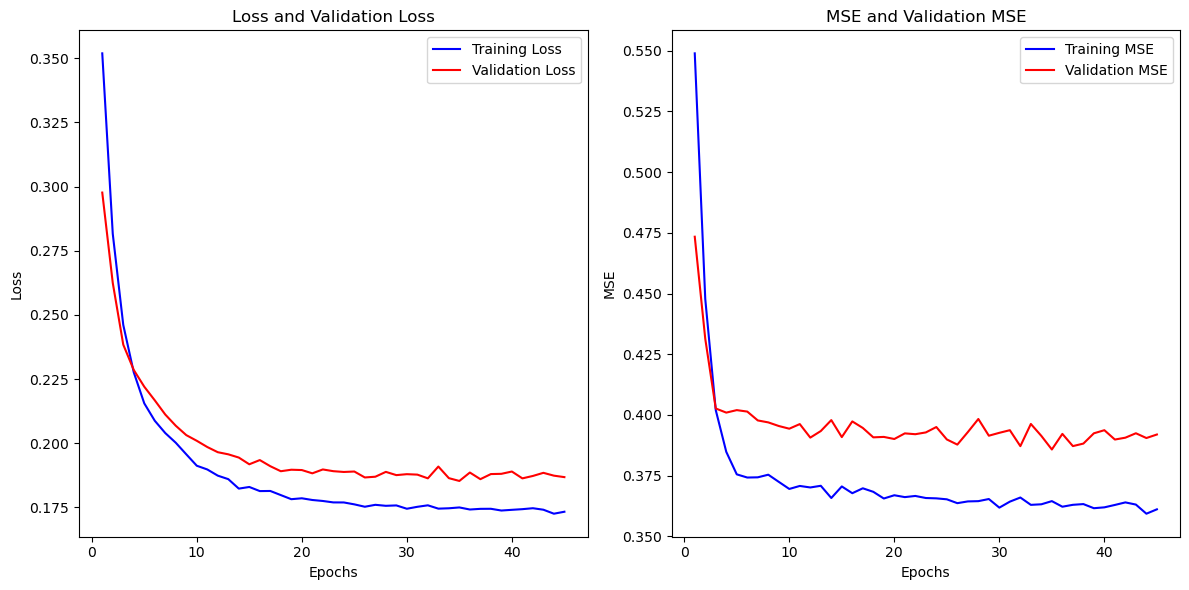

In [25]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

mse = history.history['mse']
val_mse = history.history['val_mse']

epochs = range(1, len(loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(epochs, loss, 'b', label='Training Loss')
ax1.plot(epochs, val_loss, 'r', label='Validation Loss')
ax1.set_title('Loss and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, mse, 'b', label='Training MSE')
ax2.plot(epochs, val_mse, 'r', label='Validation MSE')
ax2.set_title('MSE and Validation MSE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MSE')
ax2.legend()

plt.tight_layout()
plt.show()

In [26]:
# Menggunakan scaler untuk melakukan inverse transform pada data yang telah di-scaled
user_test_unscaled = scalerUser.inverse_transform(user_test_scaled)
item_test_unscaled = scalerItem.inverse_transform(item_test_scaled)
y_test_unscaled = scalerTarget.inverse_transform(y_test_scaled)

# Menampilkan beberapa contoh prediksi
for i in range(50):
    print('Urutan Ke-', i+1)
    print('Data Asli:', y_test_unscaled[i])
    prediction = model.predict([user_test_scaled[i].reshape(1, -1), item_test_scaled[i].reshape(1, -1)])
    prediction_unscaled = scalerTarget.inverse_transform(prediction)[0][0]
    print('Prediksi:', prediction_unscaled)
    print('---')

Urutan Ke- 1
Data Asli: [5.]
1/1 [==============================] - 0s 193ms/step
Prediksi: 3.9659429
---
Urutan Ke- 2
Data Asli: [5.]
1/1 [==============================] - 0s 23ms/step
Prediksi: 4.3428283
---
Urutan Ke- 3
Data Asli: [5.]
1/1 [==============================] - 0s 25ms/step
Prediksi: 4.035181
---
Urutan Ke- 4
Data Asli: [5.]
1/1 [==============================] - 0s 31ms/step
Prediksi: 4.2766666
---
Urutan Ke- 5
Data Asli: [4.]
1/1 [==============================] - 0s 29ms/step
Prediksi: 4.4194174
---
Urutan Ke- 6
Data Asli: [5.]
1/1 [==============================] - 0s 28ms/step
Prediksi: 3.7969494
---
Urutan Ke- 7
Data Asli: [2.]
1/1 [==============================] - 0s 30ms/step
Prediksi: 3.7969494
---
Urutan Ke- 8
Data Asli: [5.]
1/1 [==============================] - 0s 29ms/step
Prediksi: 4.5296593
---
Urutan Ke- 9
Data Asli: [1.]
1/1 [==============================] - 0s 39ms/step
Prediksi: 3.2596977
---
Urutan Ke- 10
Data Asli: [5.]
1/1 [====================

In [27]:
def predict_ratings(user_vec, item_vecs, model, scalerTarget, hotel_place, top_n=10):
    # Scale user vector
    suser_vec = scalerUser.transform(user_vec)

    # Scale item vectors
    sitem_vecs = scalerItem.transform(item_vecs)

    # Make a prediction
    y_p = model.predict([suser_vec[:, :], sitem_vecs[:, :]])

    # Unscale predicted ratings
    y_p_unscaled = scalerTarget.inverse_transform(y_p)

    # Sort the results, highest prediction first
    sorted_index = np.argsort(-y_p_unscaled, axis=0).reshape(-1).tolist()
    sorted_ypu = y_p_unscaled[sorted_index]
    sorted_items = item_vecs[sorted_index]

    # Get top N predictions
    top_n_indices = sorted_index[:top_n]
    top_n_ratings = sorted_ypu[:top_n]
    top_n_items = sorted_items[:top_n]

    # Combine with tourism_places DataFrame
    top_n_predictions = hotel_place.iloc[top_n_indices, :].copy()
    top_n_predictions['Predicted_Rating'] = top_n_ratings

    return top_n_predictions

In [28]:
def get_user_vecs(user_id, df_user, item_vecs):
    user_vec = None  # Assign a default value to user_vec
    if user_id in df_user['reviewers_Id'].values:
        user_vec = df_user[df_user['reviewers_Id'] == user_id].to_numpy()
        user_vecs = np.repeat(user_vec[:, 1:], len(item_vecs), axis=0)
    else:
        user_vec = new_user_vec
        user_vecs = np.repeat(user_vec[:, 1:], len(item_vecs), axis=0)  # Use the predefined user_vec array
    return user_vecs

In [29]:
user_id = 1
new_art_gallery = 1
new_bakery = 0
new_bar = 0
new_cafe = 5
new_clothing_store = 5
new_electronics_store = 5
new_food = 5
new_gym = 5
new_health = 5
new_home_goods_store = 0
new_lodging = 5
new_night_club = 5
new_park = 0
new_parking = 0
new_real_estate_agency = 5
new_restaurant = 5
new_shopping_mall = 0
new_spa = 0
new_store = 5
new_travel_agency = 0

# Create the user_vec array
new_user_vec = np.array([[user_id, new_art_gallery, new_bakery, new_bar, new_cafe, new_clothing_store,
                      new_electronics_store, new_food, new_gym, new_health, new_home_goods_store,
                      new_lodging, new_night_club, new_park, new_parking,
                      new_real_estate_agency, new_restaurant, new_shopping_mall, new_spa, new_store,
                      new_travel_agency]])

# Get the user_vecs array based on user_id
user_vecs = get_user_vecs(user_id, df_user, item_vecs)

# Memanggil fungsi prediksi
predictions = predict_ratings(user_vecs, item_vecs[:, 1:], model, scalerTarget, hotel_place, top_n=5)

# Menampilkan hasil prediksi
predictions

36/36 [==============================] - 0s 1ms/step


,name,place_id,formatted_address,types,user_ratings_total,rating,Predicted_Rating
476,Hotel Alia Cikini,ChIJc0ZV-uv1aS4Rxk-usfktV5s,"Jl. Cikini Raya No.32, Cikini, Kec. Menteng, K...","lodging,point_of_interest,establishment",293,4.5,4.567746
85,Samanvaya Luxury Resort & Spa - Adults Only,ChIJk2was3cQ0i0R4wF_LpZq3tQ,"Banjar Jl. Raya Tebola, Telaga Tawang, Kec. Si...","spa,lodging,restaurant,food,point_of_interest,...",615,4.9,4.567746
497,Sofyan Hotel Cut Meutia Cikini Menteng Jakarta,ChIJDQeEFTr0aS4R__ua3Ii48g0,"Jl. Cut Mutia No.9, Cikini, Kec. Menteng, Kota...","cafe,lodging,restaurant,food,store,point_of_in...",3456,4.4,4.563344
481,Cipta Hotel Pancoran,ChIJQ7cvPLjzaS4Rz7uGnZkGbKE,"Jl. Raya Pasar Minggu No.Kav. 19, Pancoran, Ke...","lodging,point_of_interest,establishment",1899,4.3,4.563344
618,PORTER LOMBOK HOTEL,ChIJrQNcE7upzS0RTOH4rXe7HgU,"Jl. Raya Kuta, Kuta, Kec. Pujut, Kabupaten Lom...","lodging,point_of_interest,establishment",90,4.8,4.563344


In [30]:
import os

model_version = "1"
model_save = "model-hotel"
model_path = os.path.join(model_save, model_version)
tf.keras.models.save_model(model, model_path)
print("Model saved successfully!")

INFO:tensorflow:Assets written to: model-hotel\1\assets


INFO:tensorflow:Assets written to: model-hotel\1\assets


Model saved successfully!
